In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
# from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import r_regression




In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data set in matrix form.csv',index_col=0)
ratings.head()

,Leslie Looney,Jans Wager,Robert Warden,Bryan Eldredge,William Hollinrake,Lauren Baumbach,Beverly Faunce,Deborah Pluss,Lauren Bold,Mary Richardson,Tracey Francese,Candice White,Pat Ledbetter,Juanita Campos,Ann Lewald,Hon Linda
StudentID/Professor Name,,,,,,,,,,,,,,,,
S1,4,4,NaN,4.0,1,NaN,NaN,4,NaN,NaN,3.0,4,3,3,3,NaN
S2,5,5,NaN,5.0,2,NaN,NaN,4,NaN,4.0,3.0,4,4,3,3,NaN
S3,4,4,3.0,4.0,1,NaN,NaN,4,NaN,4.0,3.0,4,3,3,3,NaN
S4,5,5,2.0,3.0,2,4.0,NaN,4,NaN,4.0,3.0,3,4,3,4,NaN
S5,4,4,4.0,5.0,1,3.0,NaN,4,NaN,3.0,4.0,3,3,3,4,NaN


In [ ]:
ratings = ratings.fillna(0)
ratings.head()


,Leslie Looney,Jans Wager,Robert Warden,Bryan Eldredge,William Hollinrake,Lauren Baumbach,Beverly Faunce,Deborah Pluss,Lauren Bold,Mary Richardson,Tracey Francese,Candice White,Pat Ledbetter,Juanita Campos,Ann Lewald,Hon Linda
StudentID/Professor Name,,,,,,,,,,,,,,,,
S1,4,4,0.0,4.0,1,0.0,0.0,4,0.0,0.0,3.0,4,3,3,3,0.0
S2,5,5,0.0,5.0,2,0.0,0.0,4,0.0,4.0,3.0,4,4,3,3,0.0
S3,4,4,3.0,4.0,1,0.0,0.0,4,0.0,4.0,3.0,4,3,3,3,0.0
S4,5,5,2.0,3.0,2,4.0,0.0,4,0.0,4.0,3.0,3,4,3,4,0.0
S5,4,4,4.0,5.0,1,3.0,0.0,4,0.0,3.0,4.0,3,3,3,4,0.0


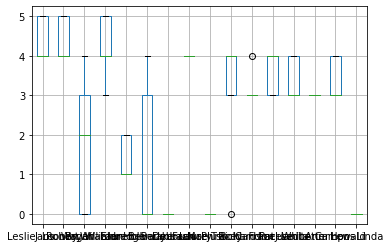

In [ ]:
ratings.head().boxplot()

In [ ]:
def standardize(row):
  new_row = ((row - row.mean()) / (row.max() - row.min()) )
  return new_row

ratings_std = ratings.apply(standardize)
ratings_std.head(5)

,Leslie Looney,Jans Wager,Robert Warden,Bryan Eldredge,William Hollinrake,Lauren Baumbach,Beverly Faunce,Deborah Pluss,Lauren Bold,Mary Richardson,Tracey Francese,Candice White,Pat Ledbetter,Juanita Campos,Ann Lewald,Hon Linda
StudentID/Professor Name,,,,,,,,,,,,,,,,
S1,-0.15,-0.5,-0.3125,0.05,-0.5,-0.575,-0.3,0.55,-0.14,-0.725,0.05,0.2,-0.5,-0.5,-0.7,-0.19
S2,0.35,0.5,-0.3125,0.25,0.5,-0.575,-0.3,0.55,-0.14,0.275,0.05,0.2,0.5,-0.5,-0.7,-0.19
S3,-0.15,-0.5,0.4375,0.05,-0.5,-0.575,-0.3,0.55,-0.14,0.275,0.05,0.2,-0.5,-0.5,-0.7,-0.19
S4,0.35,0.5,0.1875,-0.15,0.5,0.425,-0.3,0.55,-0.14,0.275,0.05,-0.8,0.5,-0.5,0.3,-0.19
S5,-0.15,-0.5,0.6875,0.25,-0.5,0.175,-0.3,0.55,-0.14,0.025,0.30,-0.8,-0.5,-0.5,0.3,-0.19


In [ ]:
#~~~~~Cosine Similarity Method~~~~~

## Let's us take Transpose, as we need Item to Item similarity which need to be in rows
cos_item_similarity = cosine_similarity(ratings_std.T)
# print(cos_item_similarity)

cos_item_similarity_df = pd.DataFrame(cos_item_similarity,index=ratings.columns,columns=ratings.columns)
s = cos_item_similarity_df.select_dtypes(include=[np.number])*10
cos_item_similarity_df[s.columns] = s
cos_item_similarity_df.head()


,Leslie Looney,Jans Wager,Robert Warden,Bryan Eldredge,William Hollinrake,Lauren Baumbach,Beverly Faunce,Deborah Pluss,Lauren Bold,Mary Richardson,Tracey Francese,Candice White,Pat Ledbetter,Juanita Campos,Ann Lewald,Hon Linda
Leslie Looney,10.000000,3.123475,3.155377,-2.492511,1.561738,0.540102,-0.544645,2.040487,0.838489,0.360401,-0.500156,3.904344e-01,4.685213,-2.600968e-16,1.363196e+00,3.393583
Jans Wager,3.123475,10.000000,-0.310835,-0.354663,6.000000,1.729171,1.162476,1.005038,-1.193100,1.538462,0.800641,-1.136846e-16,2.000000,-1.574365e-17,-5.608866e-17,0.261802
Robert Warden,3.155377,-0.310835,10.000000,2.259957,-2.175845,3.135340,1.445353,2.967808,2.317857,2.749694,3.733007,-3.108349e+00,-0.310835,3.108349e-01,1.017446e+00,5.574331
Bryan Eldredge,-2.492511,-0.354663,2.259957,10.000000,-3.191971,2.759732,0.824576,1.604026,0.528936,6.684042,6.814992,-8.866586e-01,-1.063990,-1.773317e+00,1.160909e+00,1.067792
William Hollinrake,1.561738,6.000000,-2.175845,-3.191971,10.000000,2.305562,2.324953,1.005038,1.193100,-0.769231,-0.800641,-1.291767e-16,2.000000,1.574365e-17,2.182179e+00,-2.356215


In [ ]:
for i in cos_item_similarity_df.columns:
  print(cos_item_similarity_df[i])

Leslie  Looney         1.000000e+01
Jans  Wager            3.123475e+00
Robert  Warden         3.155377e+00
Bryan  Eldredge       -2.492511e+00
William  Hollinrake    1.561738e+00
Lauren  Baumbach       5.401024e-01
Beverly  Faunce       -5.446449e-01
Deborah  Pluss         2.040487e+00
Lauren  Bold           8.384891e-01
Mary  Richardson       3.604010e-01
Tracey  Francese      -5.001563e-01
Candice  White         3.904344e-01
Pat  Ledbetter         4.685213e+00
Juanita  Campos       -2.600968e-16
Ann  Lewald            1.363196e+00
Hon  Linda             3.393583e+00
Name: Leslie  Looney, dtype: float64
Leslie  Looney         3.123475e+00
Jans  Wager            1.000000e+01
Robert  Warden        -3.108349e-01
Bryan  Eldredge       -3.546635e-01
William  Hollinrake    6.000000e+00
Lauren  Baumbach       1.729171e+00
Beverly  Faunce        1.162476e+00
Deborah  Pluss         1.005038e+00
Lauren  Bold          -1.193100e+00
Mary  Richardson       1.538462e+00
Tracey  Francese       8.00

In [ ]:
## Collaborative Filtering
## Let's Make Recomendations

def get_cos_similar_prof(prof_name,student_rating):
  similar_score = cos_item_similarity_df[prof_name]*(student_rating-2.5)*4 # 2.5 is subtracted to handle bad ratings and *4 for 100(%) scale
  similar_score = similar_score.sort_values(ascending=False)
  return similar_score

similar_score = pd.options.display.float_format = "{:.2f}".format


print("William Hollinrake : 5 Star\n")
#Give recomendations to a student who rates William Hollinrake as 5 stars
print(get_cos_similar_prof("William  Hollinrake",5))

#Give recomendations to a student who rates Leslie Looney as 1 star
print("\n\nLeslie Looney: 1 star\n")
print(get_cos_similar_prof("Leslie  Looney",2))

William Hollinrake : 5 Star

William  Hollinrake   100.00
Jans  Wager            60.00
Beverly  Faunce        23.25
Lauren  Baumbach       23.06
Ann  Lewald            21.82
Pat  Ledbetter         20.00
Leslie  Looney         15.62
Lauren  Bold           11.93
Deborah  Pluss         10.05
Juanita  Campos         0.00
Candice  White         -0.00
Mary  Richardson       -7.69
Tracey  Francese       -8.01
Robert  Warden        -21.76
Hon  Linda            -23.56
Bryan  Eldredge       -31.92
Name: William  Hollinrake, dtype: float64


Leslie Looney: 1 star

Bryan  Eldredge         4.99
Beverly  Faunce         1.09
Tracey  Francese        1.00
Juanita  Campos         0.00
Mary  Richardson       -0.72
Candice  White         -0.78
Lauren  Baumbach       -1.08
Lauren  Bold           -1.68
Ann  Lewald            -2.73
William  Hollinrake    -3.12
Deborah  Pluss         -4.08
Jans  Wager            -6.25
Robert  Warden         -6.31
Hon  Linda             -6.79
Pat  Ledbetter         -9.37
Lesli

In [ ]:
# Give recomendations for a students who have rated the below mentioned prof
Leslie_lover = [("Leslie  Looney",5),("Bryan  Eldredge",3),("Beverly  Faunce",3)]
cos_similar_prof = pd.DataFrame()

for prof,rating in Leslie_lover:
  cos_similar_prof = cos_similar_prof.append(get_cos_similar_prof(prof,rating),ignore_index=True)

cos_similar_prof.head()

,Leslie Looney,Pat Ledbetter,Hon Linda,Robert Warden,Jans Wager,Deborah Pluss,William Hollinrake,Ann Lewald,Lauren Bold,Lauren Baumbach,Candice White,Mary Richardson,Juanita Campos,Tracey Francese,Beverly Faunce,Bryan Eldredge
0,100.00,46.85,33.94,31.55,31.23,20.40,15.62,13.63,8.38,5.40,3.90,3.60,-0.00,-5.00,-5.45,-24.93
1,-4.99,-2.13,2.14,4.52,-0.71,3.21,-6.38,2.32,1.06,5.52,-1.77,13.37,-3.55,13.63,1.65,20.00
2,-1.09,-2.32,4.02,2.89,2.32,-3.27,4.65,6.60,13.59,10.99,6.97,3.76,4.65,9.68,20.00,1.65


In [ ]:
cos_similar_prof.sum().sort_values(ascending=False)

Leslie  Looney        93.93
Pat  Ledbetter        42.40
Hon  Linda            40.09
Robert  Warden        38.96
Jans  Wager           32.85
Lauren  Bold          23.03
Ann  Lewald           22.55
Lauren  Baumbach      21.91
Mary  Richardson      20.73
Deborah  Pluss        20.34
Tracey  Francese      18.31
Beverly  Faunce       16.20
William  Hollinrake   13.88
Candice  White         9.11
Juanita  Campos        1.10
Bryan  Eldredge       -3.28
dtype: float64

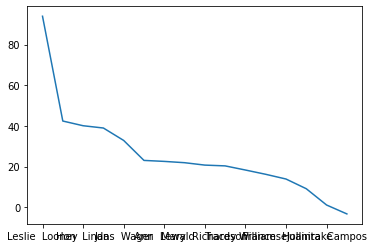

In [ ]:
cos_similar_prof.sum().sort_values(ascending=False).plot()

**Trying Pearson Method Correlation**

In [ ]:
#~~~~~Pearson Correlation Method~~~~~

pearson_item_similarity = ratings_std.corr(method ='pearson')
# print(pearson_item_similarity*10)

# converting the pearson correlation into a Data Frame using Pandas and using numpy to convert into a *10 rating
pearson_item_similarity_df = pd.DataFrame(pearson_item_similarity,index=ratings.columns,columns=ratings.columns)
s = pearson_item_similarity_df.select_dtypes(include=[np.number])*10
pearson_item_similarity_df[s.columns] = s
pearson_item_similarity_df.head()

,Leslie Looney,Jans Wager,Robert Warden,Bryan Eldredge,William Hollinrake,Lauren Baumbach,Beverly Faunce,Deborah Pluss,Lauren Bold,Mary Richardson,Tracey Francese,Candice White,Pat Ledbetter,Juanita Campos,Ann Lewald,Hon Linda
Leslie Looney,10.00,3.12,3.16,-2.49,1.56,0.54,-0.54,2.04,0.84,0.36,-0.50,0.39,4.69,-0.00,1.36,3.39
Jans Wager,3.12,10.00,-0.31,-0.35,6.00,1.73,1.16,1.01,-1.19,1.54,0.80,-0.00,2.00,0.00,-0.00,0.26
Robert Warden,3.16,-0.31,10.00,2.26,-2.18,3.14,1.45,2.97,2.32,2.75,3.73,-3.11,-0.31,0.31,1.02,5.57
Bryan Eldredge,-2.49,-0.35,2.26,10.00,-3.19,2.76,0.82,1.60,0.53,6.68,6.81,-0.89,-1.06,-1.77,1.16,1.07
William Hollinrake,1.56,6.00,-2.18,-3.19,10.00,2.31,2.32,1.01,1.19,-0.77,-0.80,-0.00,2.00,-0.00,2.18,-2.36


In [ ]:
for i in pearson_item_similarity_df.columns:
  print(pearson_item_similarity_df[i])

Leslie  Looney        10.00
Jans  Wager            3.12
Robert  Warden         3.16
Bryan  Eldredge       -2.49
William  Hollinrake    1.56
Lauren  Baumbach       0.54
Beverly  Faunce       -0.54
Deborah  Pluss         2.04
Lauren  Bold           0.84
Mary  Richardson       0.36
Tracey  Francese      -0.50
Candice  White         0.39
Pat  Ledbetter         4.69
Juanita  Campos       -0.00
Ann  Lewald            1.36
Hon  Linda             3.39
Name: Leslie  Looney, dtype: float64
Leslie  Looney         3.12
Jans  Wager           10.00
Robert  Warden        -0.31
Bryan  Eldredge       -0.35
William  Hollinrake    6.00
Lauren  Baumbach       1.73
Beverly  Faunce        1.16
Deborah  Pluss         1.01
Lauren  Bold          -1.19
Mary  Richardson       1.54
Tracey  Francese       0.80
Candice  White        -0.00
Pat  Ledbetter         2.00
Juanita  Campos        0.00
Ann  Lewald           -0.00
Hon  Linda             0.26
Name: Jans  Wager, dtype: float64
Leslie  Looney         3.16
Jans 

In [ ]:
## Collaborative Filtering
## Let's Make Recomendations

def get_pearson_similar_prof(prof_name,student_rating):
  similar_score = pearson_item_similarity_df[prof_name]*(student_rating-2.5)*4 # 2.5 is subtracted to handle bad ratings and *4 for 100(%) scale
  similar_score = similar_score.sort_values(ascending=False)
  return similar_score

similar_score = pd.options.display.float_format = "{:.2f}".format


print("William Hollinrake : 5 Star\n")
#Give recomendations to a student who rates William Hollinrake as 5 stars
print(get_pearson_similar_prof("William  Hollinrake",5))

#Give recomendations to a student who rates Leslie Looney as 1 star
print("\n\nLeslie Looney: 1 star\n")
print(get_pearson_similar_prof("Leslie  Looney",2))

William Hollinrake : 5 Star

William  Hollinrake   100.00
Jans  Wager            60.00
Beverly  Faunce        23.25
Lauren  Baumbach       23.06
Ann  Lewald            21.82
Pat  Ledbetter         20.00
Leslie  Looney         15.62
Lauren  Bold           11.93
Deborah  Pluss         10.05
Candice  White         -0.00
Juanita  Campos        -0.00
Mary  Richardson       -7.69
Tracey  Francese       -8.01
Robert  Warden        -21.76
Hon  Linda            -23.56
Bryan  Eldredge       -31.92
Name: William  Hollinrake, dtype: float64


Leslie Looney: 1 star

Bryan  Eldredge         4.99
Beverly  Faunce         1.09
Tracey  Francese        1.00
Juanita  Campos         0.00
Mary  Richardson       -0.72
Candice  White         -0.78
Lauren  Baumbach       -1.08
Lauren  Bold           -1.68
Ann  Lewald            -2.73
William  Hollinrake    -3.12
Deborah  Pluss         -4.08
Jans  Wager            -6.25
Robert  Warden         -6.31
Hon  Linda             -6.79
Pat  Ledbetter         -9.37
Lesli

In [ ]:
# Give recomendations for a students who have rated the below mentioned prof
Leslie_lover = [("Leslie  Looney",5),("Bryan  Eldredge",3),("Beverly  Faunce",3)]
pearson_similar_prof = pd.DataFrame()

for prof,rating in Leslie_lover:
  pearson_similar_prof = pearson_similar_prof.append(get_pearson_similar_prof(prof,rating),ignore_index=True)

pearson_similar_prof.head()

,Leslie Looney,Pat Ledbetter,Hon Linda,Robert Warden,Jans Wager,Deborah Pluss,William Hollinrake,Ann Lewald,Lauren Bold,Lauren Baumbach,Candice White,Mary Richardson,Juanita Campos,Tracey Francese,Beverly Faunce,Bryan Eldredge
0,100.00,46.85,33.94,31.55,31.23,20.40,15.62,13.63,8.38,5.40,3.90,3.60,-0.00,-5.00,-5.45,-24.93
1,-4.99,-2.13,2.14,4.52,-0.71,3.21,-6.38,2.32,1.06,5.52,-1.77,13.37,-3.55,13.63,1.65,20.00
2,-1.09,-2.32,4.02,2.89,2.32,-3.27,4.65,6.60,13.59,10.99,6.97,3.76,4.65,9.68,20.00,1.65


In [ ]:
pearson_similar_prof.sum().sort_values(ascending=False)

Leslie  Looney        93.93
Pat  Ledbetter        42.40
Hon  Linda            40.09
Robert  Warden        38.96
Jans  Wager           32.85
Lauren  Bold          23.03
Ann  Lewald           22.55
Lauren  Baumbach      21.91
Mary  Richardson      20.73
Deborah  Pluss        20.34
Tracey  Francese      18.31
Beverly  Faunce       16.20
William  Hollinrake   13.88
Candice  White         9.11
Juanita  Campos        1.10
Bryan  Eldredge       -3.28
dtype: float64

# **Trying Machine Learning Algorithms**

In [ ]:
import torch

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 18.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630198 sha256=1cb161e89d9512294c4468310c09776afa67aec768c2fe9d47efb35940ae21fd
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate

In [ ]:
new_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RateMyProfessor_Sample data.csv')
new_ratings

,Student_ID,professor_name,star_rating
0,S1,Leslie Looney,4.70
1,S2,Leslie Looney,4.70
2,S3,Leslie Looney,4.70
3,S4,Leslie Looney,4.70
4,S5,Leslie Looney,4.70
...,...,...,...
19995,S16,Dennis Richardson,4.00
19996,S17,Dennis Richardson,4.00
19997,S18,Dennis Richardson,4.00
19998,S19,Dennis Richardson,4.00


In [ ]:
readrating = Reader(rating_scale=(0.5,5.0))
data = Dataset.load_from_df(new_ratings[['Student_ID','professor_name','star_rating']],readrating)

***Non-Negative Matrix Factorisation Method Implementation***

In [ ]:
algo = NMF()
cross_validate(algo,data,measures=['RMSE','MAE'],cv=5,verbose=True)


Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1149  0.1228  0.1173  0.1110  0.1304  0.1193  0.0068  
MAE (testset)     0.0764  0.0811  0.0804  0.0750  0.0790  0.0784  0.0024  
Fit time          2.14    2.42    1.61    1.21    1.11    1.70    0.51    
Test time         0.12    0.04    0.02    0.02    0.02    0.05    0.04    


{'fit_time': (2.144348382949829,
  2.4246022701263428,
  1.6073577404022217,
  1.2092108726501465,
  1.109419584274292),
 'test_mae': array([0.07635462, 0.08113854, 0.08043648, 0.07498588, 0.07900624]),
 'test_rmse': array([0.11494292, 0.12282138, 0.11732258, 0.11099539, 0.13042391]),
 'test_time': (0.11926603317260742,
  0.0419924259185791,
  0.023094892501831055,
  0.023200273513793945,
  0.023021459579467773)}

***KNN Algorithm Implementation:***

In [ ]:
from surprise import KNNBasic
algo = KNNBasic()
cross_validate(algo, data, measures=['RMSE', 'MAE'],cv=5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0343  0.1119  0.0472  0.0068  0.0254  0.0451  0.0359  
MAE (testset)     0.0015  0.0059  0.0023  0.0004  0.0011  0.0022  0.0019  
Fit time          0.01    0.02    0.03    0.02    0.02    0.02    0.01    
Test time         0.21    0.17    0.18    0.18    0.18    0.18    0.01    


{'fit_time': (0.011040687561035156,
  0.019103527069091797,
  0.03259611129760742,
  0.0209197998046875,
  0.018860340118408203),
 'test_mae': array([0.00146643, 0.00590933, 0.00231517, 0.00039286, 0.001097  ]),
 'test_rmse': array([0.03427081, 0.11192441, 0.04719719, 0.00678666, 0.02544287]),
 'test_time': (0.2067546844482422,
  0.1700742244720459,
  0.1845841407775879,
  0.1772603988647461,
  0.1764824390411377)}

***Singluar Value Decomposition Implementation***

In [ ]:
from surprise import SVD
algo = SVD()
cross_validate(algo, data, measures=['RMSE','MAE'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1700  0.1668  0.1731  0.1831  0.1989  0.1784  0.0116  
MAE (testset)     0.0935  0.0927  0.0947  0.0957  0.0991  0.0951  0.0022  
Fit time          1.87    2.06    0.98    0.95    2.10    1.59    0.52    
Test time         0.07    0.03    0.03    0.03    0.08    0.05    0.02    


{'fit_time': (1.8688673973083496,
  2.063265800476074,
  0.9764401912689209,
  0.9541337490081787,
  2.0993547439575195),
 'test_mae': array([0.09347022, 0.09268517, 0.09474397, 0.09570013, 0.09906584]),
 'test_rmse': array([0.17004169, 0.1668178 , 0.17305148, 0.18312134, 0.19886791]),
 'test_time': (0.07107663154602051,
  0.025725603103637695,
  0.025806427001953125,
  0.025183677673339844,
  0.08014369010925293)}

***Plotting Comparsion between KNN and NVM***

In [ ]:
import matplotlib.pyplot as plt

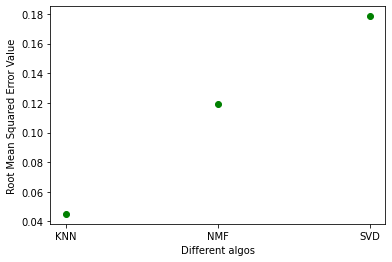

In [ ]:
rmse = [0.0451, 0.1193,0.1784]
algos = ['KNN','NMF','SVD']
plt.plot(algos, rmse, 'go',)
plt.xlabel("Different algos")
plt.ylabel("Root Mean Squared Error Value")
plt.show()

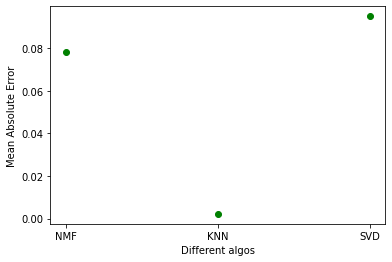

In [ ]:
mae = [0.0784, 0.0022 ,0.0951]
algos = ['NMF','KNN','SVD']
plt.plot(algos, mae, 'go',)
plt.xlabel("Different algos")
plt.ylabel("Mean Absolute")
plt.show()

# Thankyou Ma'am 😄
- *A Good Teacher is like a Candle,
it consumes itself to light the way for others*

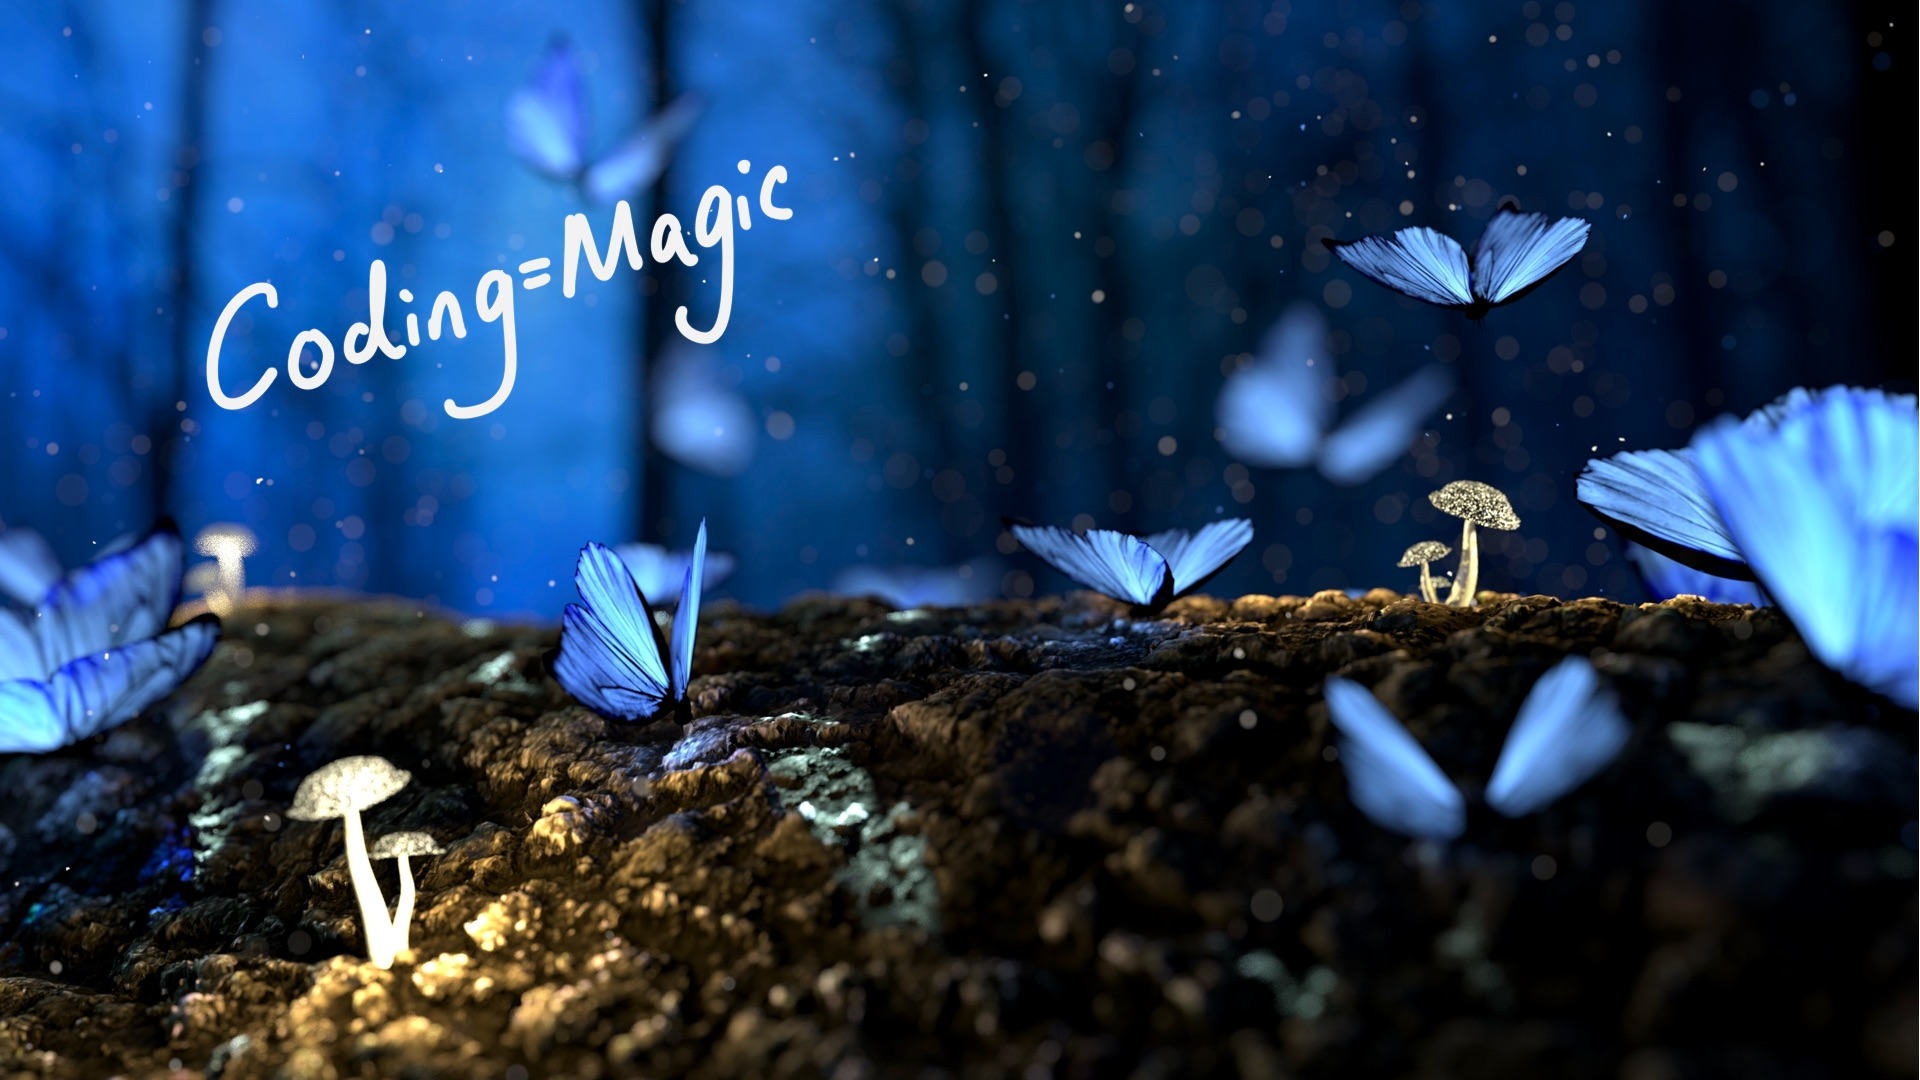